### 학습관련기술들   
- 드롭아웃을 적용한 신경망으로 학습 및 테스트를 구현하자
- 오버피팅(Over-fitting)
    + 훈련 데이터에만 너무 적응해 버려서 시험데이터에 제대로 대응하지 못하는 현상
    + 매개변수에 비해 상대적으로 훈련 데이터 수가 적을때 발생함
- 드롭아웃
    + 오버피팅 억제 방법
    + 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제하는 방법. 즉, 신호를 전달하지 않음

In [ ]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

train loss:2.308708258254836
=== epoch:1, train acc:0.10666666666666667, test acc:0.0885 ===
train loss:2.3139177178545007
train loss:2.29483126894528
train loss:2.282361093789328
=== epoch:2, train acc:0.1, test acc:0.0867 ===
train loss:2.2954574312645337
train loss:2.310422215546757
train loss:2.296291938919323
=== epoch:3, train acc:0.1, test acc:0.0872 ===
train loss:2.297042658674721
train loss:2.2970776671538364
train loss:2.3048493224651825
=== epoch:4, train acc:0.10333333333333333, test acc:0.0872 ===
train loss:2.283135509774817
train loss:2.2919991997426665
train loss:2.294857849626554
=== epoch:5, train acc:0.10666666666666667, test acc:0.0888 ===
train loss:2.2836055494393537
train loss:2.3006994971321078
train loss:2.298022423247096
=== epoch:6, train acc:0.10666666666666667, test acc:0.0892 ===
train loss:2.3087974441555286
train loss:2.286338347525473
train loss:2.2643561975214355
=== epoch:7, train acc:0.10666666666666667, test acc:0.091 ===
train loss:2.2954667864329

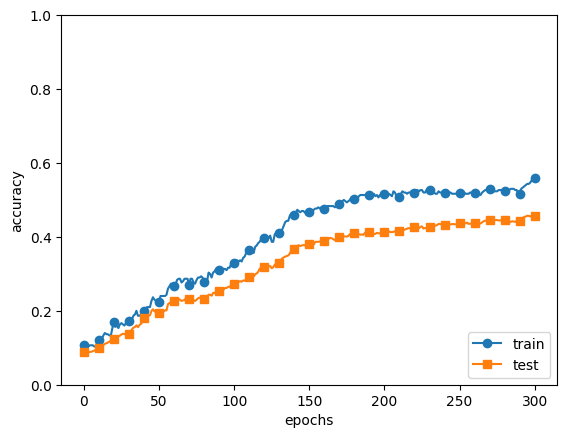

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임(300개로)
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비율 설정=====
use_dropout = True # drop out 쓰지 않을 때는 False
dropput_ratio = 0.2 # drop out 비율
# =================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                        output_size=10, use_dropout=use_dropout, dropout_ration=dropput_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                epochs=301, mini_batch_size=100,
                optimizer='sgd', optimizer_param={'lr':0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

markers = {"train": "o", "test": "s"}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
